# 14장. 텐서플로의 구조 자세히 알아보기

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,tensorflow,matplotlib

/home/haesun/anaconda3/envs/python-ml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


last updated: 2019-03-14 

CPython 3.7.2
IPython 7.3.0

numpy 1.16.1
tensorflow 2.0.0-alpha0
matplotlib 3.0.2


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## 텐서플로의 랭크와 텐서

**텐서의 랭크와 크기를 확인하는 방법**

In [3]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()
print('크기:', s1, s2, s3)

print('랭크:', 
      r1.numpy(), 
      r2.numpy(), 
      r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## 텐서플로의 계산 그래프 이해하기

In [4]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


In [5]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [6]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>]

In [7]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [8]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2) 
    c = tf.constant(3) 

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [9]:
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [10]:
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    return z

simple_func = tf.function(simple_func)

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [11]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Identity' type=Identity>]

In [12]:
con_func.graph.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

## 텐서플로의 변수

In [13]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64>


In [14]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

In [15]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [16]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [17]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [18]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [19]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [20]:
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


## 케라스 API 자세히 배우기

### Sequential 모델

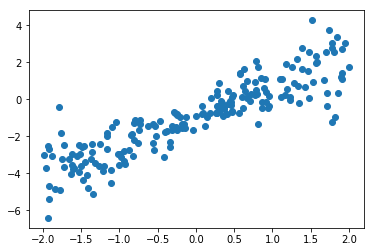

In [21]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.savefig('../../gen_images/14_03.png', dpi=300)
plt.show()

In [22]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=10, activation="relu", input_dim=1))
model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 2ms/sample - loss: 5.8134 - val_loss: 3.9157
Epoch 2/300
105/105 [==============================] - 0s 79us/sample - loss: 5.6878 - val_loss: 3.8465
Epoch 3/300
105/105 [==============================] - 0s 75us/sample - loss: 5.5651 - val_loss: 3.7792
Epoch 4/300
105/105 [==============================] - 0s 77us/sample - loss: 5.4404 - val_loss: 3.7131
Epoch 5/300
105/105 [==============================] - 0s 69us/sample - loss: 5.3222 - val_loss: 3.6517
Epoch 6/300
105/105 [==============================] - 0s 72us/sample - loss: 5.2056 - val_loss: 3.5948
Epoch 7/300
105/105 [==============================] - 0s 72us/sample - loss: 5.1016 - val_loss: 3.5375
Epoch 8/300
105/105 [==============================] - 0s 71us/sample - loss: 4.9951 - val_loss: 3.4764
Epoch 9/300
105/105 [==============================] - 0s 71us/sample - loss: 4.8895 - val_loss: 3.4237
Epoch 10/300
105/105

105/105 [==============================] - 0s 72us/sample - loss: 1.2122 - val_loss: 1.3605
Epoch 79/300
105/105 [==============================] - 0s 65us/sample - loss: 1.1921 - val_loss: 1.3479
Epoch 80/300
105/105 [==============================] - 0s 70us/sample - loss: 1.1747 - val_loss: 1.3362
Epoch 81/300
105/105 [==============================] - 0s 68us/sample - loss: 1.1574 - val_loss: 1.3246
Epoch 82/300
105/105 [==============================] - 0s 70us/sample - loss: 1.1423 - val_loss: 1.3140
Epoch 83/300
105/105 [==============================] - 0s 68us/sample - loss: 1.1282 - val_loss: 1.3024
Epoch 84/300
105/105 [==============================] - 0s 69us/sample - loss: 1.1142 - val_loss: 1.2937
Epoch 85/300
105/105 [==============================] - 0s 79us/sample - loss: 1.1021 - val_loss: 1.2811
Epoch 86/300
105/105 [==============================] - 0s 65us/sample - loss: 1.0858 - val_loss: 1.2677
Epoch 87/300
105/105 [==============================] - 0s 126us/sam

105/105 [==============================] - 0s 64us/sample - loss: 0.7684 - val_loss: 0.9483
Epoch 156/300
105/105 [==============================] - 0s 63us/sample - loss: 0.7673 - val_loss: 0.9471
Epoch 157/300
105/105 [==============================] - 0s 64us/sample - loss: 0.7669 - val_loss: 0.9459
Epoch 158/300
105/105 [==============================] - 0s 75us/sample - loss: 0.7660 - val_loss: 0.9451
Epoch 159/300
105/105 [==============================] - 0s 71us/sample - loss: 0.7655 - val_loss: 0.9431
Epoch 160/300
105/105 [==============================] - 0s 64us/sample - loss: 0.7643 - val_loss: 0.9406
Epoch 161/300
105/105 [==============================] - 0s 63us/sample - loss: 0.7634 - val_loss: 0.9402
Epoch 162/300
105/105 [==============================] - 0s 74us/sample - loss: 0.7631 - val_loss: 0.9396
Epoch 163/300
105/105 [==============================] - 0s 82us/sample - loss: 0.7624 - val_loss: 0.9379
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 67us/sample - loss: 0.7448 - val_loss: 0.8887
Epoch 233/300
105/105 [==============================] - 0s 82us/sample - loss: 0.7447 - val_loss: 0.8881
Epoch 234/300
105/105 [==============================] - 0s 75us/sample - loss: 0.7452 - val_loss: 0.8894
Epoch 235/300
105/105 [==============================] - 0s 64us/sample - loss: 0.7445 - val_loss: 0.8889
Epoch 236/300
105/105 [==============================] - 0s 66us/sample - loss: 0.7445 - val_loss: 0.8888
Epoch 237/300
105/105 [==============================] - 0s 74us/sample - loss: 0.7445 - val_loss: 0.8890
Epoch 238/300
105/105 [==============================] - 0s 74us/sample - loss: 0.7445 - val_loss: 0.8896
Epoch 239/300
105/105 [==============================] - 0s 77us/sample - loss: 0.7444 - val_loss: 0.8899
Epoch 240/300
105/105 [==============================] - 0s 72us/sample - loss: 0.7443 - val_loss: 0.8895
Epoch 241/300
105/105 [==============================] - 0s 

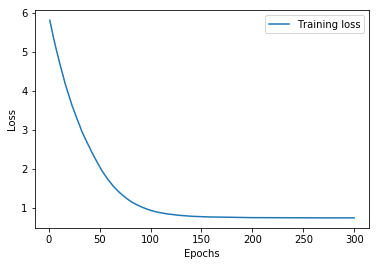

In [26]:
epochs = np.arange(1, 300+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../../gen_images/14_04.png', dpi=300)
plt.show()

### 함수형 API

In [27]:
from tensorflow.keras import Model, Input

input = Input(shape=(1,))
hidden = Dense(10, activation='relu')(input)
output = Dense(1)(hidden)

model = Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 1ms/sample - loss: 5.8730 - val_loss: 3.3948
Epoch 2/300
105/105 [==============================] - 0s 83us/sample - loss: 5.7470 - val_loss: 3.3385
Epoch 3/300
105/105 [==============================] - 0s 73us/sample - loss: 5.6171 - val_loss: 3.2804
Epoch 4/300
105/105 [==============================] - 0s 68us/sample - loss: 5.4853 - val_loss: 3.2196
Epoch 5/300
105/105 [==============================] - 0s 83us/sample - loss: 5.3485 - val_loss: 3.1666
Epoch 6/300
105/105 [==============================] - 0s 72us/sample - loss: 5.2297 - val_loss: 3.1203
Epoch 7/300
105/105 [==============================] - 0s 65us/sample - loss: 5.1246 - val_loss: 3.0681
Epoch 8/300
105/105 [==============================] - 0s 67us/sample - loss: 5.0048 - val_loss: 3.0236
Epoch 9/300
105/105 [==============================] - 0s 81us/sample - loss: 4.9057 - val_loss: 2.9799
Epoch 10/300
105/105

105/105 [==============================] - 0s 80us/sample - loss: 1.2906 - val_loss: 1.3386
Epoch 79/300
105/105 [==============================] - 0s 73us/sample - loss: 1.2697 - val_loss: 1.3265
Epoch 80/300
105/105 [==============================] - 0s 75us/sample - loss: 1.2475 - val_loss: 1.3164
Epoch 81/300
105/105 [==============================] - 0s 84us/sample - loss: 1.2276 - val_loss: 1.3039
Epoch 82/300
105/105 [==============================] - 0s 87us/sample - loss: 1.2083 - val_loss: 1.2949
Epoch 83/300
105/105 [==============================] - 0s 73us/sample - loss: 1.1924 - val_loss: 1.2856
Epoch 84/300
105/105 [==============================] - 0s 70us/sample - loss: 1.1764 - val_loss: 1.2764
Epoch 85/300
105/105 [==============================] - 0s 62us/sample - loss: 1.1607 - val_loss: 1.2670
Epoch 86/300
105/105 [==============================] - 0s 67us/sample - loss: 1.1414 - val_loss: 1.2565
Epoch 87/300
105/105 [==============================] - 0s 80us/samp

105/105 [==============================] - 0s 85us/sample - loss: 0.7733 - val_loss: 0.9591
Epoch 156/300
105/105 [==============================] - 0s 73us/sample - loss: 0.7724 - val_loss: 0.9589
Epoch 157/300
105/105 [==============================] - 0s 68us/sample - loss: 0.7723 - val_loss: 0.9580
Epoch 158/300
105/105 [==============================] - 0s 81us/sample - loss: 0.7722 - val_loss: 0.9568
Epoch 159/300
105/105 [==============================] - 0s 71us/sample - loss: 0.7710 - val_loss: 0.9553
Epoch 160/300
105/105 [==============================] - 0s 76us/sample - loss: 0.7700 - val_loss: 0.9540
Epoch 161/300
105/105 [==============================] - 0s 66us/sample - loss: 0.7696 - val_loss: 0.9521
Epoch 162/300
105/105 [==============================] - 0s 78us/sample - loss: 0.7683 - val_loss: 0.9496
Epoch 163/300
105/105 [==============================] - 0s 61us/sample - loss: 0.7673 - val_loss: 0.9477
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 72us/sample - loss: 0.7440 - val_loss: 0.8902
Epoch 233/300
105/105 [==============================] - 0s 72us/sample - loss: 0.7440 - val_loss: 0.8901
Epoch 234/300
105/105 [==============================] - 0s 64us/sample - loss: 0.7439 - val_loss: 0.8891
Epoch 235/300
105/105 [==============================] - 0s 80us/sample - loss: 0.7441 - val_loss: 0.8890
Epoch 236/300
105/105 [==============================] - 0s 67us/sample - loss: 0.7437 - val_loss: 0.8885
Epoch 237/300
105/105 [==============================] - 0s 73us/sample - loss: 0.7438 - val_loss: 0.8891
Epoch 238/300
105/105 [==============================] - 0s 67us/sample - loss: 0.7435 - val_loss: 0.8889
Epoch 239/300
105/105 [==============================] - 0s 85us/sample - loss: 0.7439 - val_loss: 0.8885
Epoch 240/300
105/105 [==============================] - 0s 74us/sample - loss: 0.7435 - val_loss: 0.8881
Epoch 241/300
105/105 [==============================] - 0s 

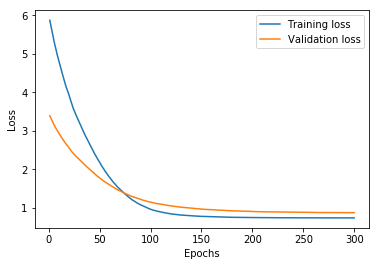

In [29]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../../gen_images/14_05.png', dpi=300)
plt.show()

## 케라스 모델 저장과 복원

In [30]:
model.save_weights('simple_regression.h5')

In [31]:
model = Sequential()
model.add(Dense(units=10, activation="relu", input_dim=1))
model.add(Dense(units=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_regression.h5')

In [32]:
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 653us/sample - loss: 1.0062


1.0062094020843506

In [33]:
model.save('simple_model.h5')

In [34]:
from tensorflow.keras.models import load_model

model = load_model('simple_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 673us/sample - loss: 1.0062


1.0062094020843506

In [35]:
model = Sequential()
model.add(Dense(units=10, activation="relu", input_dim=1))
model.add(Dense(units=1))
model.compile(optimizer='sgd', loss='mse')

from tensorflow.keras.callbacks import ModelCheckpoint

callback_list = [ModelCheckpoint(filepath='my_model.h5', 
                                 monitor='val_loss', save_best_only=True)]
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 988us/sample - loss: 4.0204 - val_loss: 2.4785
Epoch 2/300
120/120 [==============================] - 0s 109us/sample - loss: 3.9376 - val_loss: 2.4285
Epoch 3/300
120/120 [==============================] - 0s 101us/sample - loss: 3.8550 - val_loss: 2.3782
Epoch 4/300
120/120 [==============================] - 0s 102us/sample - loss: 3.7746 - val_loss: 2.3306
Epoch 5/300
120/120 [==============================] - 0s 105us/sample - loss: 3.6949 - val_loss: 2.2846
Epoch 6/300
120/120 [==============================] - 0s 97us/sample - loss: 3.6201 - val_loss: 2.2395
Epoch 7/300
120/120 [==============================] - 0s 108us/sample - loss: 3.5451 - val_loss: 2.1956
Epoch 8/300
120/120 [==============================] - 0s 95us/sample - loss: 3.4721 - val_loss: 2.1519
Epoch 9/300
120/120 [==============================] - 0s 96us/sample - loss: 3.4021 - val_loss: 2.1100
Epoch 10/300


120/120 [==============================] - 0s 184us/sample - loss: 1.1529 - val_loss: 0.7996
Epoch 79/300
120/120 [==============================] - 0s 111us/sample - loss: 1.1434 - val_loss: 0.7945
Epoch 80/300
120/120 [==============================] - 0s 112us/sample - loss: 1.1333 - val_loss: 0.7896
Epoch 81/300
120/120 [==============================] - 0s 101us/sample - loss: 1.1249 - val_loss: 0.7843
Epoch 82/300
120/120 [==============================] - 0s 106us/sample - loss: 1.1153 - val_loss: 0.7794
Epoch 83/300
120/120 [==============================] - 0s 98us/sample - loss: 1.1061 - val_loss: 0.7744
Epoch 84/300
120/120 [==============================] - 0s 110us/sample - loss: 1.0972 - val_loss: 0.7701
Epoch 85/300
120/120 [==============================] - 0s 102us/sample - loss: 1.0889 - val_loss: 0.7659
Epoch 86/300
120/120 [==============================] - 0s 93us/sample - loss: 1.0810 - val_loss: 0.7620
Epoch 87/300
120/120 [==============================] - 0s 10

120/120 [==============================] - 0s 65us/sample - loss: 0.8608 - val_loss: 0.6690
Epoch 156/300
120/120 [==============================] - 0s 97us/sample - loss: 0.8597 - val_loss: 0.6689
Epoch 157/300
120/120 [==============================] - 0s 56us/sample - loss: 0.8588 - val_loss: 0.6690
Epoch 158/300
120/120 [==============================] - 0s 58us/sample - loss: 0.8579 - val_loss: 0.6690
Epoch 159/300
120/120 [==============================] - 0s 64us/sample - loss: 0.8566 - val_loss: 0.6691
Epoch 160/300
120/120 [==============================] - 0s 54us/sample - loss: 0.8557 - val_loss: 0.6691
Epoch 161/300
120/120 [==============================] - 0s 56us/sample - loss: 0.8547 - val_loss: 0.6690
Epoch 162/300
120/120 [==============================] - 0s 61us/sample - loss: 0.8537 - val_loss: 0.6691
Epoch 163/300
120/120 [==============================] - 0s 54us/sample - loss: 0.8531 - val_loss: 0.6692
Epoch 164/300
120/120 [==============================] - 0s 

120/120 [==============================] - 0s 60us/sample - loss: 0.8174 - val_loss: 0.6860
Epoch 233/300
120/120 [==============================] - 0s 67us/sample - loss: 0.8178 - val_loss: 0.6862
Epoch 234/300
120/120 [==============================] - 0s 59us/sample - loss: 0.8169 - val_loss: 0.6865
Epoch 235/300
120/120 [==============================] - 0s 63us/sample - loss: 0.8164 - val_loss: 0.6867
Epoch 236/300
120/120 [==============================] - 0s 59us/sample - loss: 0.8162 - val_loss: 0.6869
Epoch 237/300
120/120 [==============================] - 0s 62us/sample - loss: 0.8158 - val_loss: 0.6872
Epoch 238/300
120/120 [==============================] - 0s 67us/sample - loss: 0.8155 - val_loss: 0.6873
Epoch 239/300
120/120 [==============================] - 0s 49us/sample - loss: 0.8153 - val_loss: 0.6877
Epoch 240/300
120/120 [==============================] - 0s 58us/sample - loss: 0.8149 - val_loss: 0.6880
Epoch 241/300
120/120 [==============================] - 0s 

저장된 모델 복원:

In [36]:
model = load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 656us/sample - loss: 1.0965


1.0964699649810792

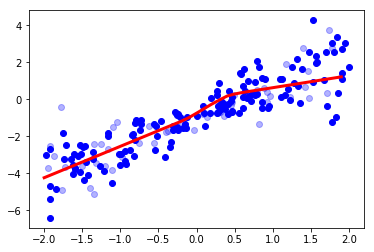

In [37]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.savefig('../../gen_images/14_08.png', dpi=400)
plt.show()

## 텐서를 다차원 배열로 변환하기

In [38]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[ 0.22613483,  0.22330971, -1.16654888, -0.59371599],
       [-1.40608288,  0.46867727,  0.09847034, -0.77515762],
       [ 0.31413519,  0.8974029 , -0.13932577,  0.73768109]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([-0.37963847,  0.7480918 ,  0.28543433])>


In [39]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)
T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [40]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)
T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [41]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2, 
                   axis=2)
print(t5_splt)

[<tf.Tensor: id=34904, shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: id=34905, shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [42]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## 계산 그래프 시각화하기

In [43]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, kernel_regularizer='l2'))

In [44]:
from tensorflow.keras.callbacks import TensorBoard

callback_list = [TensorBoard()]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 1ms/sample - loss: 15.0378 - val_loss: 10.2772
Epoch 2/300
105/105 [==============================] - 0s 85us/sample - loss: 14.6887 - val_loss: 10.0860
Epoch 3/300
105/105 [==============================] - 0s 78us/sample - loss: 14.4011 - val_loss: 9.9153
Epoch 4/300
105/105 [==============================] - 0s 67us/sample - loss: 14.1347 - val_loss: 9.7228
Epoch 5/300
105/105 [==============================] - 0s 71us/sample - loss: 13.8435 - val_loss: 9.5309
Epoch 6/300
105/105 [==============================] - 0s 79us/sample - loss: 13.5501 - val_loss: 9.3403
Epoch 7/300
105/105 [==============================] - 0s 70us/sample - loss: 13.2576 - val_loss: 9.1600
Epoch 8/300
105/105 [==============================] - 0s 67us/sample - loss: 12.9765 - val_loss: 8.9789
Epoch 9/300
105/105 [==============================] - 0s 76us/sample - loss: 12.6943 - val_loss: 8.8006
Epoch 10/

105/105 [==============================] - 0s 79us/sample - loss: 3.4174 - val_loss: 2.7830
Epoch 79/300
105/105 [==============================] - 0s 81us/sample - loss: 3.3578 - val_loss: 2.7439
Epoch 80/300
105/105 [==============================] - 0s 153us/sample - loss: 3.3009 - val_loss: 2.7062
Epoch 81/300
105/105 [==============================] - 0s 93us/sample - loss: 3.2468 - val_loss: 2.6693
Epoch 82/300
105/105 [==============================] - 0s 66us/sample - loss: 3.1952 - val_loss: 2.6361
Epoch 83/300
105/105 [==============================] - 0s 77us/sample - loss: 3.1449 - val_loss: 2.5984
Epoch 84/300
105/105 [==============================] - 0s 69us/sample - loss: 3.0886 - val_loss: 2.5603
Epoch 85/300
105/105 [==============================] - 0s 74us/sample - loss: 3.0322 - val_loss: 2.5251
Epoch 86/300
105/105 [==============================] - 0s 68us/sample - loss: 2.9805 - val_loss: 2.4932
Epoch 87/300
105/105 [==============================] - 0s 81us/sam

105/105 [==============================] - 0s 71us/sample - loss: 1.2689 - val_loss: 1.3276
Epoch 156/300
105/105 [==============================] - 0s 81us/sample - loss: 1.2577 - val_loss: 1.3189
Epoch 157/300
105/105 [==============================] - 0s 76us/sample - loss: 1.2465 - val_loss: 1.3102
Epoch 158/300
105/105 [==============================] - 0s 78us/sample - loss: 1.2343 - val_loss: 1.3036
Epoch 159/300
105/105 [==============================] - 0s 70us/sample - loss: 1.2246 - val_loss: 1.2966
Epoch 160/300
105/105 [==============================] - 0s 79us/sample - loss: 1.2154 - val_loss: 1.2891
Epoch 161/300
105/105 [==============================] - 0s 76us/sample - loss: 1.2059 - val_loss: 1.2821
Epoch 162/300
105/105 [==============================] - 0s 75us/sample - loss: 1.1966 - val_loss: 1.2757
Epoch 163/300
105/105 [==============================] - 0s 76us/sample - loss: 1.1880 - val_loss: 1.2693
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 78us/sample - loss: 0.8652 - val_loss: 1.0206
Epoch 233/300
105/105 [==============================] - 0s 79us/sample - loss: 0.8627 - val_loss: 1.0178
Epoch 234/300
105/105 [==============================] - 0s 83us/sample - loss: 0.8601 - val_loss: 1.0167
Epoch 235/300
105/105 [==============================] - 0s 74us/sample - loss: 0.8585 - val_loss: 1.0159
Epoch 236/300
105/105 [==============================] - 0s 75us/sample - loss: 0.8574 - val_loss: 1.0150
Epoch 237/300
105/105 [==============================] - 0s 78us/sample - loss: 0.8562 - val_loss: 1.0142
Epoch 238/300
105/105 [==============================] - 0s 89us/sample - loss: 0.8548 - val_loss: 1.0129
Epoch 239/300
105/105 [==============================] - 0s 68us/sample - loss: 0.8535 - val_loss: 1.0110
Epoch 240/300
105/105 [==============================] - 0s 71us/sample - loss: 0.8518 - val_loss: 1.0097
Epoch 241/300
105/105 [==============================] - 0s 

In [45]:
input = Input(shape=(784,))
hidden = Dense(100)(input)
output = Dense(10)(hidden)

model = Model(input, output)

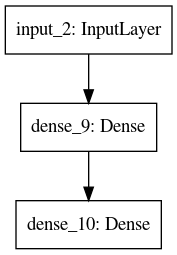

In [46]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_1.png')

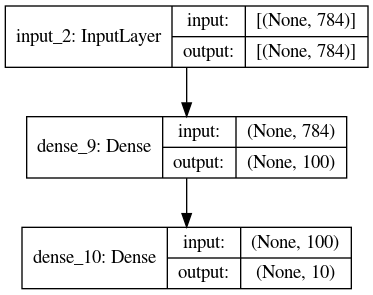

In [47]:
plot_model(model, show_shapes=True, to_file='model_2.png')